# Estimated and observed closest strains per timepoint

Create a figure similar to Figure 2D in Neher et al. 2014 showing the minimum estimated distance to the future and minimum observed distance to the future per timepoint.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
sns.set_style("white")
plt.style.use("huddlej")

In [4]:
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.weight'] = 300
mpl.rcParams['axes.labelweight'] = 300
mpl.rcParams['font.size'] = 18

In [97]:
df = pd.read_csv(
    "../results/builds/natural/natural_sample_0_with_90_vpm_sliding/natural_sample_0_with_90_vpm_sliding_delta_frequency-cTiter-ne_star_forecast.tsv",
    sep="\t"
)

In [98]:
df.head()

,timepoint,strain,frequency,weighted_distance_to_present,weighted_distance_to_future,fitness,projected_frequency,y,weighted_distance_to_future_by_delta_frequency-cTiter-ne_star,future_timepoint
0,1993-10-01,A/Netherlands/126/1993,0.009072,4.043942,7.439956,-2.324493,1.218509e-04,3.384775,3.384775,1994-10-01
1,1993-10-01,A/Netherlands/165/1993,0.015226,14.252614,17.811164,-7.842640,8.207491e-07,13.773169,13.773169,1994-10-01
2,1993-10-01,A/Netherlands/17/1993,0.000123,6.959802,10.578763,-3.064178,7.884778e-07,6.384514,6.384514,1994-10-01
3,1993-10-01,A/NewYork/754/1993,0.000549,4.924480,8.578773,-3.204311,3.059128e-06,4.384151,4.384151,1994-10-01
4,1993-10-01,A/NewYork/755/1993,0.020792,2.254680,5.600916,0.175177,3.401064e-03,1.382043,1.382043,1994-10-01


In [99]:
mean_distance_to_future_df = df.groupby("timepoint")["weighted_distance_to_future"].mean().reset_index()
mean_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1993-10-01,6.149515
1,1994-04-01,9.819302
2,1994-10-01,11.828929
3,1995-04-01,12.684255
4,1995-10-01,16.999796


In [100]:
# Find the minimum weighted distance to the future.
minimum_distance_to_future_df = df.groupby("timepoint")["weighted_distance_to_future"].min().reset_index()
minimum_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1993-10-01,4.600921
1,1994-04-01,7.749080
2,1994-10-01,9.585163
3,1995-04-01,4.770550
4,1995-10-01,6.308835


In [101]:
estimated_distance_to_future_df = df.sort_values(
    ["timepoint", "fitness"],
    ascending=False
).groupby("timepoint")["weighted_distance_to_future"].first().reset_index()
estimated_distance_to_future_df.head()

,timepoint,weighted_distance_to_future
0,1993-10-01,4.600921
1,1994-04-01,7.749080
2,1994-10-01,10.912103
3,1995-04-01,15.130010
4,1995-10-01,11.702205


In [102]:
df.dropna().shape

(17306, 10)

In [103]:
sorted_df = df.dropna().sort_values(
    ["timepoint"]
).copy()

In [104]:
sorted_df.head()

,timepoint,strain,frequency,weighted_distance_to_present,weighted_distance_to_future,fitness,projected_frequency,y,weighted_distance_to_future_by_delta_frequency-cTiter-ne_star,future_timepoint
0,1993-10-01,A/Netherlands/126/1993,0.009072,4.043942,7.439956,-2.324493,0.000122,3.384775,3.384775,1994-10-01
29,1993-10-01,A/NewYork/780/1993,0.013154,2.309828,5.599630,1.944852,0.012628,1.370111,1.370111,1994-10-01
30,1993-10-01,A/NewYork/781/1993,0.034447,1.336139,4.600921,2.735952,0.072946,0.395367,0.395367,1994-10-01
31,1993-10-01,A/NewYork/782/1993,0.043046,5.742071,9.591806,-6.968612,0.000006,5.394514,5.394514,1994-10-01
32,1993-10-01,A/NewYork/783/1993,0.040885,3.158079,6.600911,-2.209616,0.000616,2.392903,2.392903,1994-10-01


In [105]:
sorted_df["timepoint_rank"] = sorted_df.groupby("timepoint")["weighted_distance_to_future"].rank(pct=True)

In [106]:
sorted_df.head(5)

,timepoint,strain,frequency,weighted_distance_to_present,weighted_distance_to_future,fitness,projected_frequency,y,weighted_distance_to_future_by_delta_frequency-cTiter-ne_star,future_timepoint,timepoint_rank
0,1993-10-01,A/Netherlands/126/1993,0.009072,4.043942,7.439956,-2.324493,0.000122,3.384775,3.384775,1994-10-01,0.833333
29,1993-10-01,A/NewYork/780/1993,0.013154,2.309828,5.599630,1.944852,0.012628,1.370111,1.370111,1994-10-01,0.592593
30,1993-10-01,A/NewYork/781/1993,0.034447,1.336139,4.600921,2.735952,0.072946,0.395367,0.395367,1994-10-01,0.212963
31,1993-10-01,A/NewYork/782/1993,0.043046,5.742071,9.591806,-6.968612,0.000006,5.394514,5.394514,1994-10-01,0.907407
32,1993-10-01,A/NewYork/783/1993,0.040885,3.158079,6.600911,-2.209616,0.000616,2.392903,2.392903,1994-10-01,0.796296


In [107]:
best_fitness_rank_by_timepoint_df = sorted_df.sort_values(
    ["timepoint", "fitness"],
    ascending=False
).groupby("timepoint")["timepoint_rank"].first().reset_index()

In [108]:
best_fitness_rank_by_timepoint_df.head()

,timepoint,timepoint_rank
0,1993-10-01,0.212963
1,1994-04-01,0.017544
2,1994-10-01,0.187500
3,1995-04-01,0.696721
4,1995-10-01,0.234375


In [109]:
np.arange(0, 1.01, 0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Text(0,0.5,'Number of timepoints')

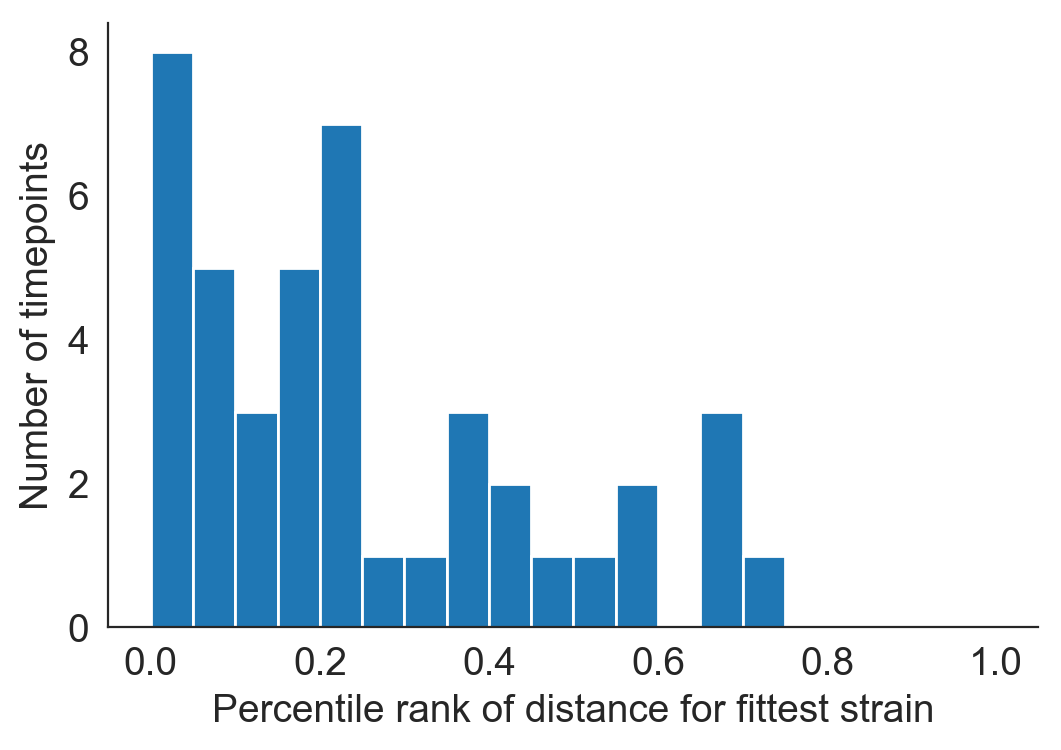

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(best_fitness_rank_by_timepoint_df["timepoint_rank"], bins=np.arange(0, 1.01, 0.05))
ax.set_xlabel("Percentile rank of distance for fittest strain")
ax.set_ylabel("Number of timepoints")

In [114]:
timepoints_in_lowest_20_pct = (best_fitness_rank_by_timepoint_df["timepoint_rank"] < 0.25).sum()
timepoints_in_lowest_20_pct

28

In [115]:
total_timepoints = best_fitness_rank_by_timepoint_df.shape[0]
total_timepoints

43

In [116]:
timepoints_in_lowest_20_pct / float(total_timepoints)

0.6511627906976745

In [73]:
distance_df = mean_distance_to_future_df.merge(
    minimum_distance_to_future_df,
    on="timepoint",
    suffixes=["_mean", "_observed"]
).merge(
    estimated_distance_to_future_df,
    on="timepoint"
)
distance_df.head()

,timepoint,weighted_distance_to_future_mean,weighted_distance_to_future_observed,weighted_distance_to_future
0,1995-10-01,17.001804,6.311513,11.704883
1,1996-04-01,11.614254,6.750710,6.750710
2,1996-10-01,13.582028,8.973677,12.949729
3,1997-04-01,11.810146,6.382600,14.222939
4,1997-10-01,13.604810,5.828201,14.974391


In [74]:
distance_df["distance_predicted"] = distance_df["weighted_distance_to_future"] / distance_df["weighted_distance_to_future_mean"]
distance_df["distance_minimum"] = distance_df["weighted_distance_to_future_observed"] / distance_df["weighted_distance_to_future_mean"]
distance_df.head()

,timepoint,weighted_distance_to_future_mean,weighted_distance_to_future_observed,weighted_distance_to_future,distance_predicted,distance_minimum
0,1995-10-01,17.001804,6.311513,11.704883,0.688449,0.371226
1,1996-04-01,11.614254,6.750710,6.750710,0.581244,0.581244
2,1996-10-01,13.582028,8.973677,12.949729,0.953446,0.660702
3,1997-04-01,11.810146,6.382600,14.222939,1.204298,0.540434
4,1997-10-01,13.604810,5.828201,14.974391,1.100669,0.428393


Text(0,0.5,'$\\Delta$(prediction)')

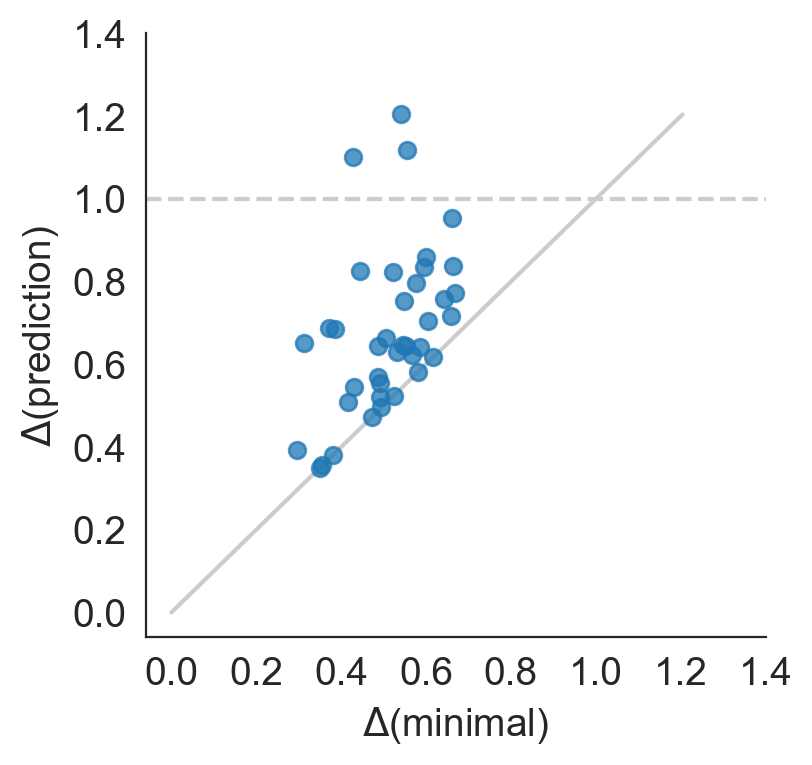

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

max_distance = max(distance_df["distance_predicted"].max(), distance_df["distance_minimum"].max())
line = np.linspace(
    0,
    max_distance,
    10
)

ax.plot(
    distance_df["distance_minimum"],
    distance_df["distance_predicted"],
    "o",
    alpha=0.75
)

ax.plot(line, line, color="#cccccc", zorder=-10)
ax.axhline(y=1, color="#cccccc", linestyle="--", zorder=-10)

ticks = np.arange(0, max_distance + 0.2, 0.2)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlabel("$\Delta$(minimal)")
ax.set_ylabel("$\Delta$(prediction)")